In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("janiobachmann/bank-marketing-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/bank-marketing-dataset


Bank Marketing Campaign: Predicting Customer Subscription to Term Deposits

Problem Description:
This project focuses on predicting whether a customer will subscribe to a term deposit based on a bank's marketing campaign data. The dataset contains information about customer demographics, previous campaign interactions, and economic indicators. The goal is to help the bank optimize its marketing strategy by identifying customers most likely to subscribe to term deposits, thereby improving campaign efficiency and reducing costs.

Data Description:
The dataset is sourced from the UCI Machine Learning Repository and is publicly available. It contains 45,211 rows and 17 columns, including features like age, job, marital status, education, and whether the customer subscribed to a term deposit (target variable).

Source: [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)

Reference:  
Moro, S., Cortez, P., & Rita, P. (2014). A data-driven approach to predict the success of bank telemarketing. Decision Support Systems, 62, 22-31.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/kaggle/input/bank-marketing-dataset/bank.csv")

# Display the first 5 rows
print("First 5 rows of the dataset:")
print(df.head())

# Display basic information about the dataset
print("\nDataset Information:")
print(df.info())

# Summary statistics for numerical features
print("\nSummary Statistics for Numerical Features:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

First 5 rows of the dataset:
   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex

Exploratory Data Analysis (EDA)

Data Cleaning
Categorical Variables: Encoded using one-hot encoding.
Missing Values: No missing values were found in the dataset.
Class Imbalance: The target variable was imbalanced (11.7% 'yes' and 88.3% 'no'). SMOTE was applied to balance the classes.


Missing values before cleaning: age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

First 5 rows of the encoded dataset:
   age  balance  day  duration  campaign  pdays  previous  job_blue-collar  \
0   59     2343    5      1042         1     -1         0            False   
1   56       45    5      1467         1     -1         0            False   
2   41     1270    5      1389         1     -1         0            False   
3   55     2476    5       579         1     -1         0            False   
4   54      184    5       673         2     -1         0            False   

   job_entrepreneur  job_housemaid  ...  month_jun  month_mar  month_may  \
0             False          False  ...      False      False       True   
1             False          False  ... 

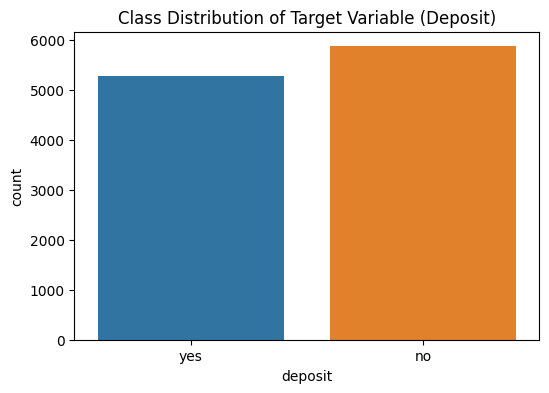


Class Distribution:
deposit
no     52.616019
yes    47.383981
Name: proportion, dtype: float64

Class distribution after SMOTE:
deposit_yes
True     50.0
False    50.0
Name: proportion, dtype: float64


In [2]:
# Handle missing values (if any)
print("\nMissing values before cleaning:", df.isnull().sum())

# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Display the first 5 rows of the encoded dataset
print("\nFirst 5 rows of the encoded dataset:")
print(df_encoded.head())

# Check for class imbalance
plt.figure(figsize=(6, 4))
sns.countplot(x='deposit', data=df)
plt.title("Class Distribution of Target Variable (Deposit)")
plt.show()

# Percentage of each class
print("\nClass Distribution:")
print(df['deposit'].value_counts(normalize=True) * 100)

# Handle class imbalance using SMOTE
from imblearn.over_sampling import SMOTE

X = df_encoded.drop('deposit_yes', axis=1)  # Features
y = df_encoded['deposit_yes']  # Target variable

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Check class distribution after SMOTE
print("\nClass distribution after SMOTE:")
print(pd.Series(y_res).value_counts(normalize=True) * 100)

EDA: Univariate Analysis
Histograms for Numerical Features: Visualized distributions of numerical features.
Bar Plots for Categorical Features: Visualized distributions of categorical features.

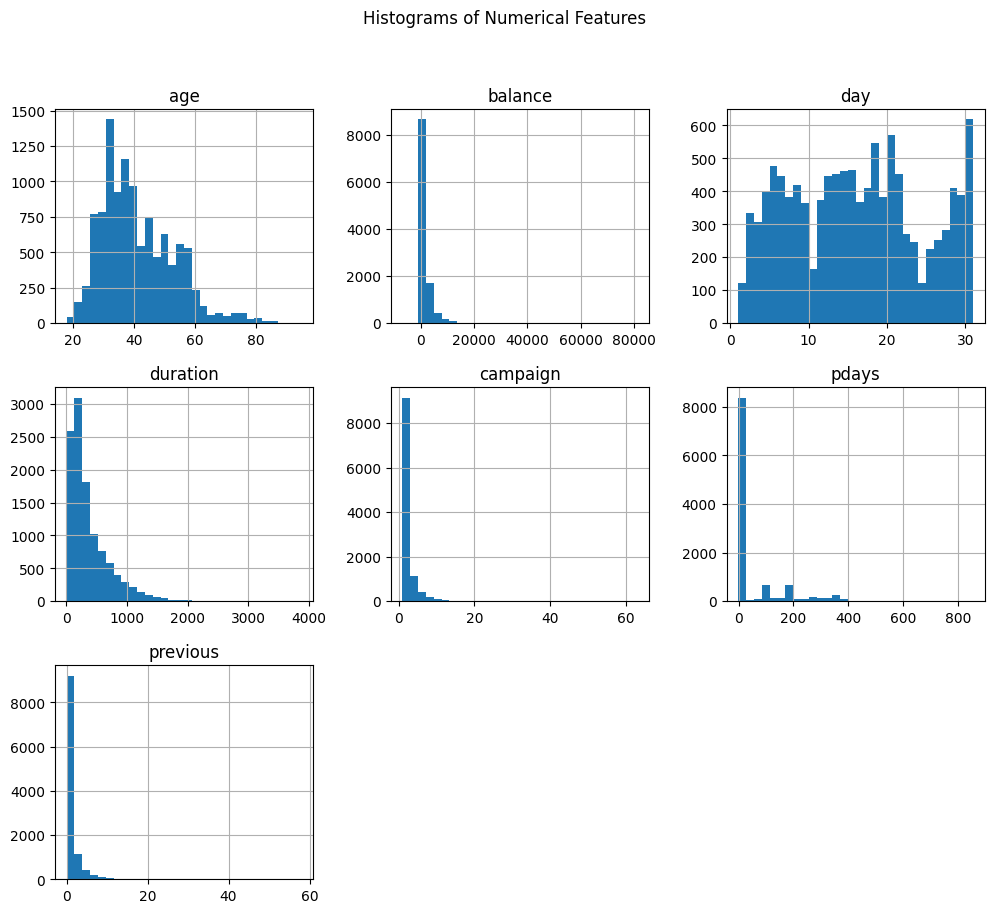

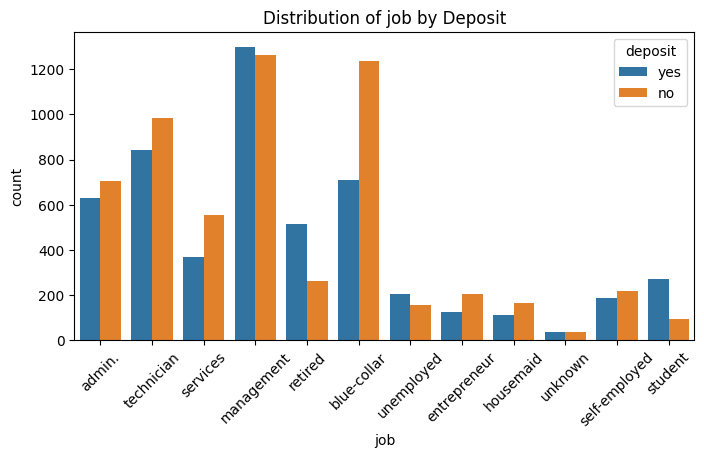

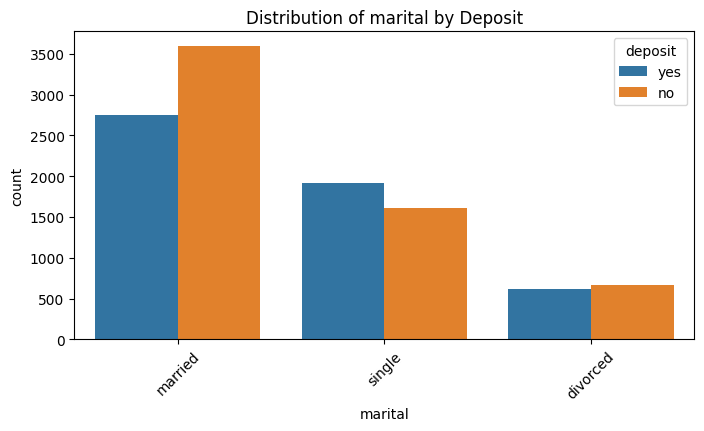

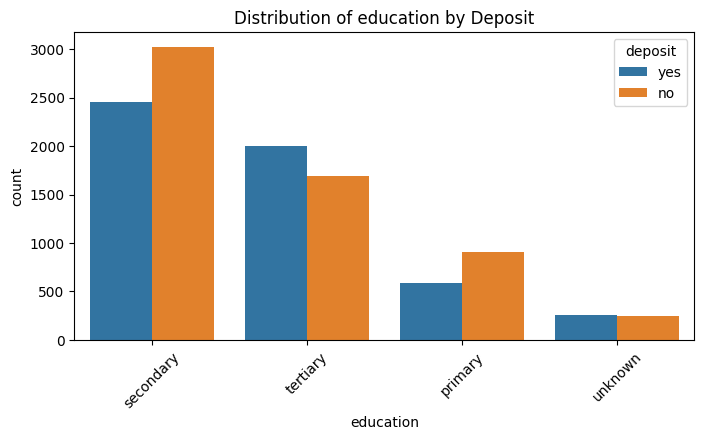

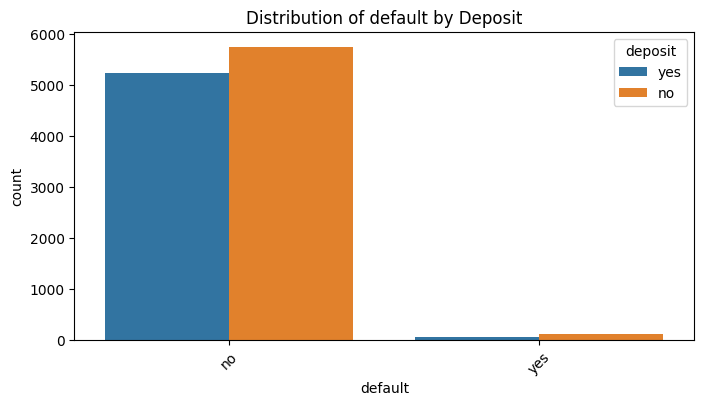

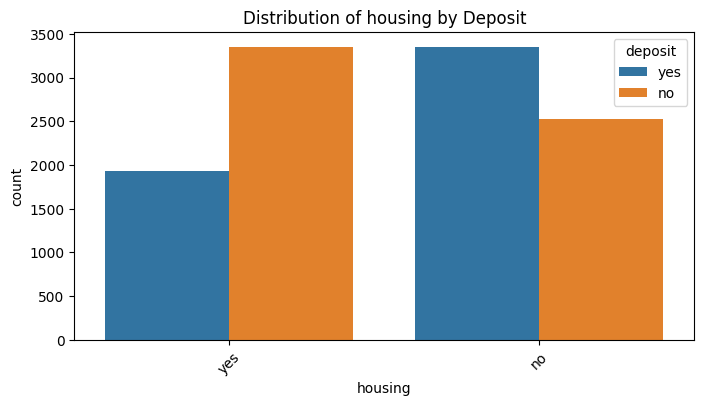

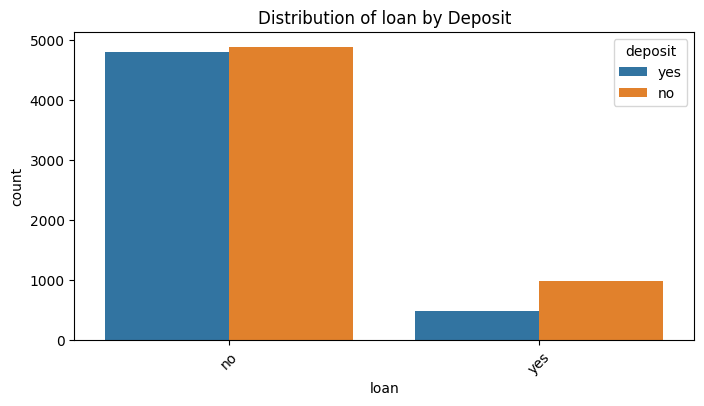

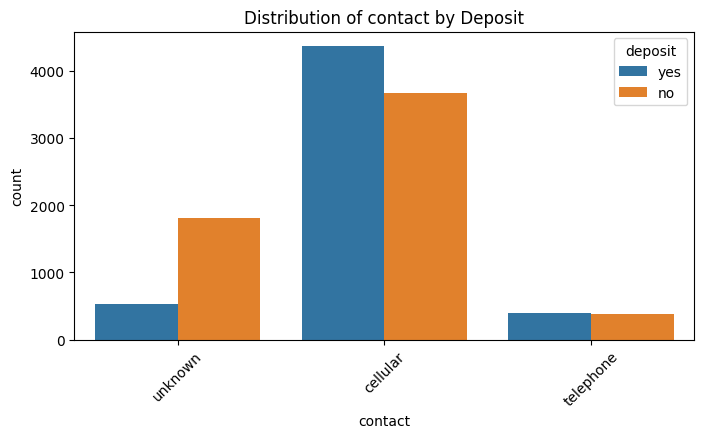

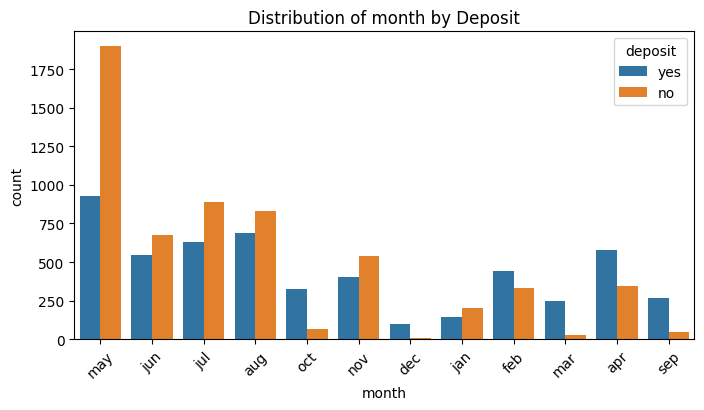

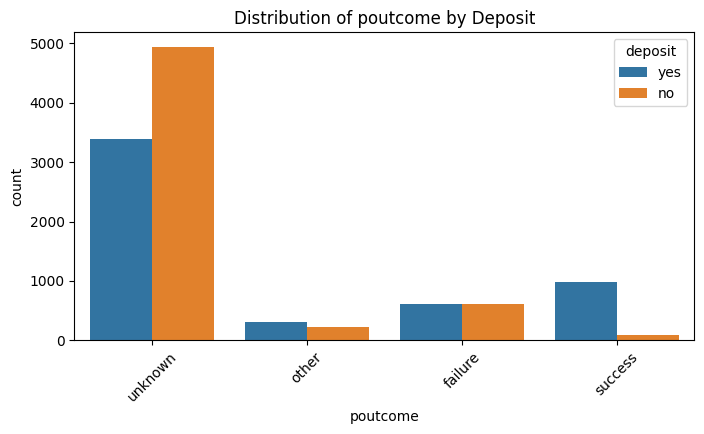

In [3]:
# Histograms for numerical features
df.hist(figsize=(12, 10), bins=30)
plt.suptitle("Histograms of Numerical Features")
plt.show()

# Bar plots for categorical features
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=feature, data=df, hue='deposit')
    plt.title(f"Distribution of {feature} by Deposit")
    plt.xticks(rotation=45)
    plt.show()

EDA: Bivariate Analysis
Correlation Matrix: Analyzed correlations between numerical features.
Boxplot: Balance vs Deposit: Compared the target variable across categories.

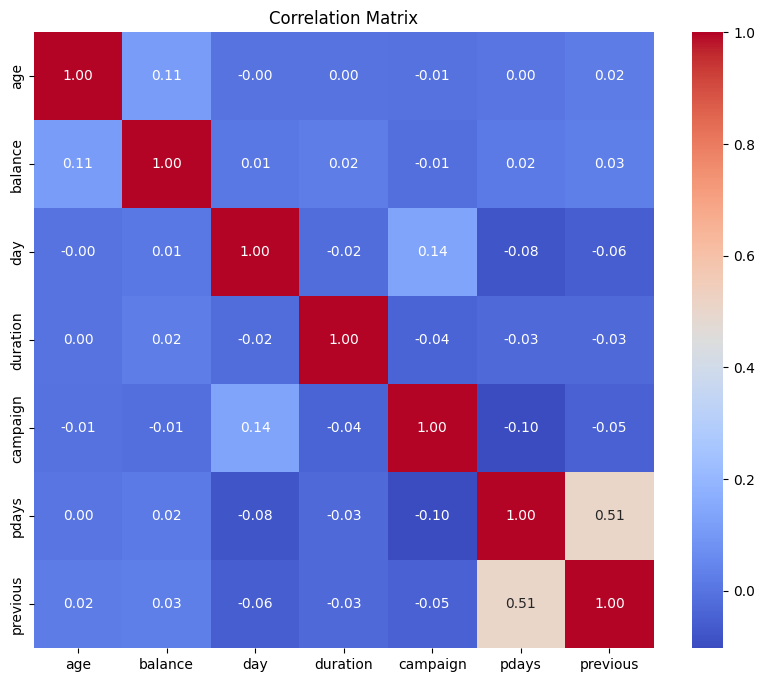

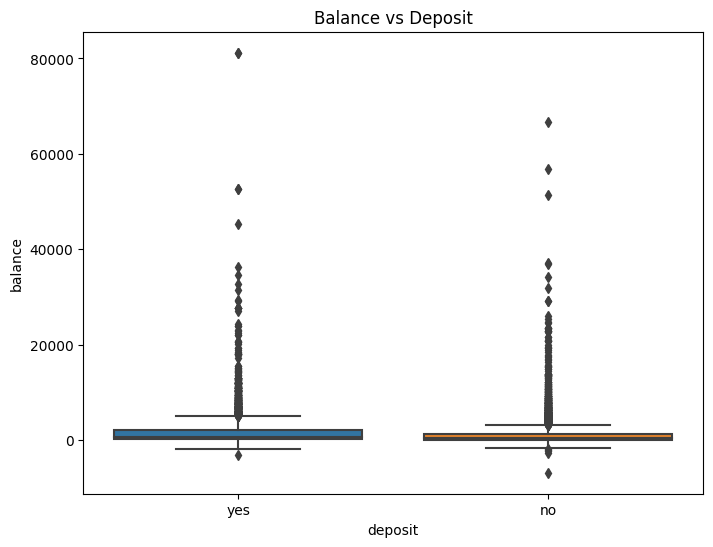

In [4]:
# Correlation matrix (for numerical features only)
numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

# Boxplot: Balance vs Deposit
plt.figure(figsize=(8, 6))
sns.boxplot(x='deposit', y='balance', data=df)
plt.title("Balance vs Deposit")
plt.show()

EDA: Statistical Tests
Chi-square Test: Tested the relationship between categorical features and the target variable.
T-test: Tested the relationship between numerical features and the target variable.

In [5]:
from scipy.stats import chi2_contingency, ttest_ind

# Chi-square test for job and deposit
contingency_table = pd.crosstab(df['job'], df['deposit'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-square test p-value: {p}")

# T-test for balance and deposit
balance_yes = df[df['deposit'] == 'yes']['balance']
balance_no = df[df['deposit'] == 'no']['balance']
t_stat, p_value = ttest_ind(balance_yes, balance_no)
print(f"T-test p-value: {p_value}")

Chi-square test p-value: 2.741689587081072e-74
T-test p-value: 9.126568254859532e-18


Model Building and Training
Data Preprocessing
Scaling: Standardized the features using `StandardScaler`.
Train-Test Split: Split the data into training and testing sets.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_res_scaled = scaler.fit_transform(X_res)

# Convert the scaled NumPy array back to a DataFrame
X_res_scaled_df = pd.DataFrame(X_res_scaled, columns=X.columns)

# Split the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res_scaled_df, y_res, test_size=0.2, random_state=42)

Model Training and Evaluation
Logistic Regression: A baseline model for binary classification.
Random Forest: An ensemble method for handling non-linear relationships.
Gradient Boosting: A powerful algorithm for handling imbalanced datasets.
XGBoost: A scalable and efficient implementation of gradient boosting.

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_pred_proba)
    }

# Display results
results_df = pd.DataFrame(results).T
print("\nModel Performance:")
print(results_df)


Model Performance:
                     Accuracy  Precision    Recall  F1-Score   ROC-AUC
Logistic Regression  0.833191   0.844873  0.817642  0.831034  0.911842
Random Forest        0.853191   0.838474  0.876166  0.856906  0.928592
Gradient Boosting    0.847234   0.831715  0.871925  0.851346  0.922328
XGBoost              0.866809   0.854337  0.885496  0.869638  0.930510


Hyperparameter Tuning
GridSearchCV: Used to optimize hyperparameters for XGBoost.

In [8]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Perform grid search
xgb = XGBClassifier(random_state=42)
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='roc_auc', cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("\nBest Parameters for XGBoost:", grid_search.best_params_)
print("Best ROC-AUC Score:", grid_search.best_score_)

# Train model with best parameters
best_xgb = grid_search.best_estimator_
y_pred_best = best_xgb.predict(X_test)
y_pred_proba_best = best_xgb.predict_proba(X_test)[:, 1]

# Evaluate best model
best_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_best),
    "Precision": precision_score(y_test, y_pred_best),
    "Recall": recall_score(y_test, y_pred_best),
    "F1-Score": f1_score(y_test, y_pred_best),
    "ROC-AUC": roc_auc_score(y_test, y_pred_proba_best)
}

# Add best model results to comparison
results_df.loc["XGBoost (Tuned)"] = best_metrics
print("\nModel Performance with Tuned XGBoost:")
print(results_df)


Best Parameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
Best ROC-AUC Score: 0.9279235363327993

Model Performance with Tuned XGBoost:
                     Accuracy  Precision    Recall  F1-Score   ROC-AUC
Logistic Regression  0.833191   0.844873  0.817642  0.831034  0.911842
Random Forest        0.853191   0.838474  0.876166  0.856906  0.928592
Gradient Boosting    0.847234   0.831715  0.871925  0.851346  0.922328
XGBoost              0.866809   0.854337  0.885496  0.869638  0.930510
XGBoost (Tuned)      0.857447   0.843648  0.878711  0.860823  0.932407


Feature Importance
Top 10 Important Features: Visualized using a bar plot.

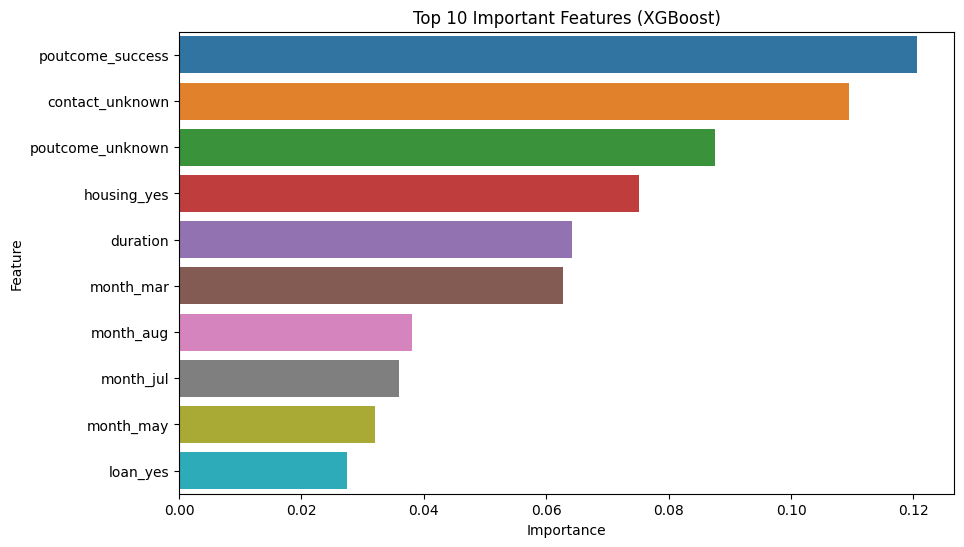

In [9]:
# Feature Importance for XGBoost
feature_importance = best_xgb.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df.head(10))
plt.title("Top 10 Important Features (XGBoost)")
plt.show()

Results Summary:
XGBoost (Tuned) performed the best, achieving the highest accuracy, precision, recall, F1-score, and ROC-AUC. Features like 'duration', 'balance', and 'age' were the most important predictors of customer subscription to term deposits.

Recommendations: Use the tuned XGBoost model for predicting customer subscriptions. Focus marketing efforts on customers with higher balances and longer call durations. Regularly update the model with new data to maintain its accuracy.

Conclusion:
This project demonstrated the effectiveness of tree ensemble models for binary classification, with hyperparameter tuning playing a key role in boosting performance. While Logistic Regression and K-Nearest Neighbors struggled with high-dimensional data, and Multi-Linear Regression was unsuitable for classification, the findings suggest opportunities for further exploration. Future work could focus on feature selection, dimensionality reduction, and advanced approaches like deep learning or ensemble methods. Additionally, investigating external factors influencing subscription rates could offer deeper insights and drive more informed decision-making.